# **Project Name**    - 



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** - Humayel
##### **Team Member 2 -** - Divyanshu Chauhan
##### **Team Member 3 -** - Shubham Singh
##### **Team Member 4 -** - Ahmed Arhan

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/humayel1/Hotel-Booking-Analysis/blob/main/README.md

# **Problem Statement**


**Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business. We can use the patterns to predict the future bookings using time series or decision trees.

We will be using the data available to analyze the factors affecting the hotel bookings. These factors can be used for reporting the trends and predict the future bookings.

We will be tackling this problem statement
1. How Many Booking Were Cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. What is the percentage of booking for each year?
4. Which is the busiest month for hotels?
5. From which country most guests come?
6. How Long People Stay in the hotel?
7. Which was the most booked accommodation type (Single, Couple, Family)?
8. Number of bookings on weekday vs weekends
9. The revenue of the hotels
10. Hotels available for booking
11. Total bookings across years
12. Total revenue across years split by hotel type
13.Calculating the average number of bookings and average revenue generated per week
14. Calculating the average number of new customers per week**

#### **Define Your Business Objective?**

*Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.ticker as mtick

Main Libraries to be used:
* Pandas for data manipulation, aggregation
* Matplotlib and Seaborn for visualisation and behaviour with respect to the
target variable. 
* NumPy for computationally efficient operations
* missingno generates a matrix visualization where each column represents a variable in the dataset, and each row represents an entry. The missing values are represented by white lines in the matrix.

### Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filepath = "/content/drive/MyDrive/Hotel Bookings.csv"
hotel_data = pd.read_csv(filepath)


### Dataset First View

In [7]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [8]:

row_count = len(hotel_data)
column_count = len(hotel_data.columns)
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 119390
Number of columns: 32


### Dataset Information

In [9]:
hotel_data.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

#### Duplicate Values

In [10]:
duplicate_count = hotel_data.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 31994


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
missing_values_count = hotel_data.isnull().sum().sort_values(ascending=False)

print("Missing values count:")
print(missing_values_count)

Missing values count:
company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                             

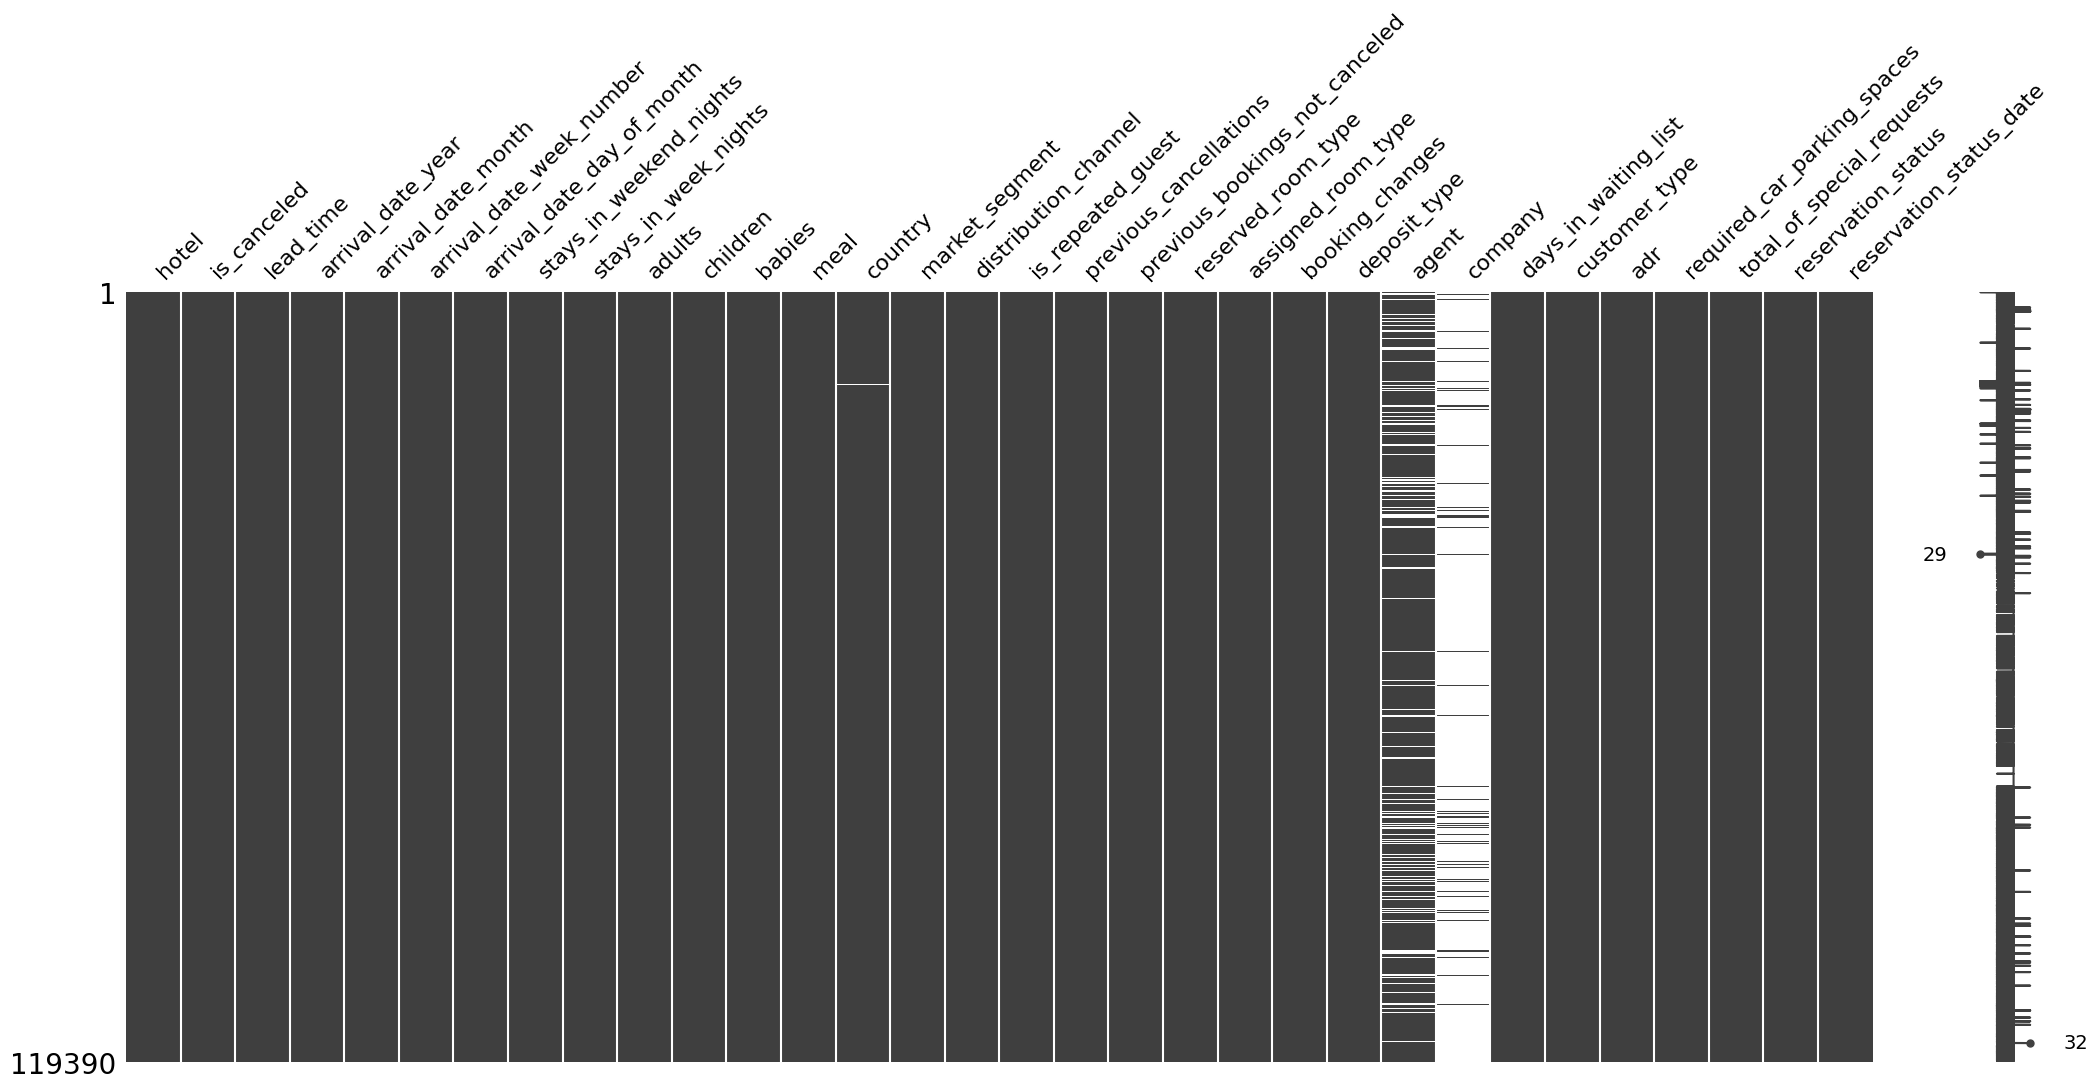

In [12]:
# Visualizing the missing values
msno.matrix(hotel_data)
plt.show()

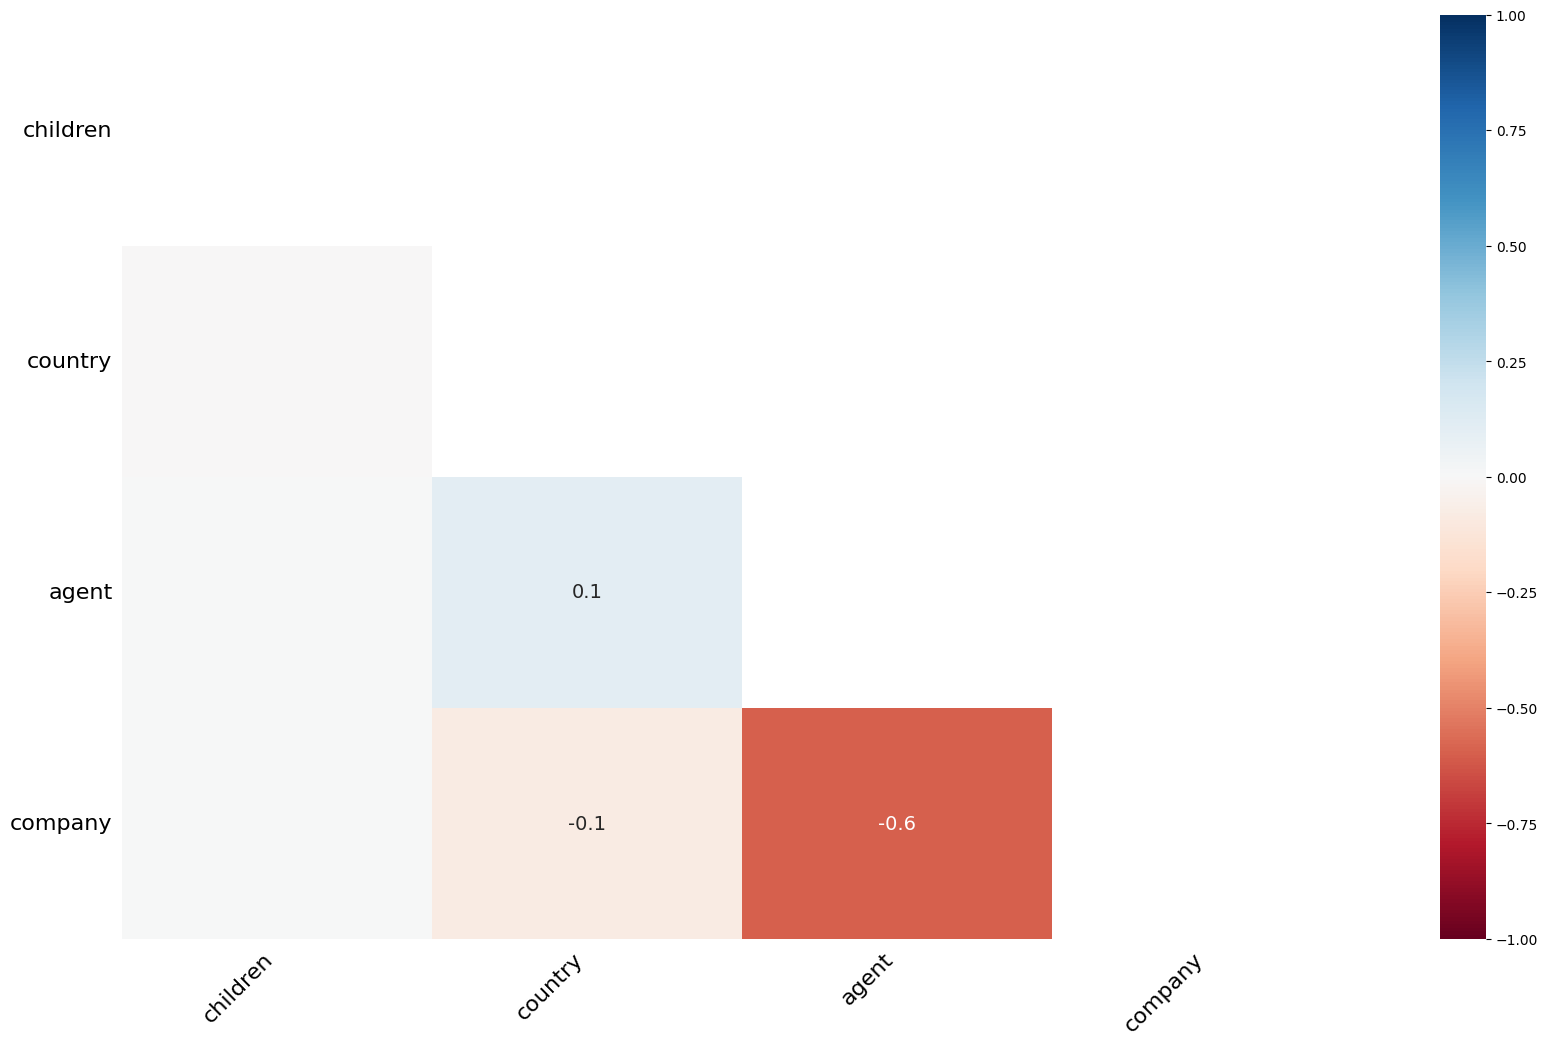

In [13]:
msno.heatmap(hotel_data)
plt.show()

### What did you know about your dataset?

*  is_cancelled:
If the booking was cancelled(l ) or
not(O)
* Hotel: H1 = Resort Hotel
H2=City Hotel
* lead_time: 
Number of days that elapsed between
the entering date of the booking into the
PMS and the arrival date
* arrival-date-year:
Year of arrival date
* arrival_date_month: Month of arrival date
* arrival_date_week_number: Week number for arrival date
* arrival-dat-day: Day of arrival date
* stays_in_weekend_nights: 
Number of weekend nights (Saturday or
Sunday) the guest stayed or booked to
stay at the hotel
* stays-in_week_nights: 
Number of week nights (Monday to
Friday) the guest stayed or booked to
stay at the hotel
* adults: 
Number of adults
* children: 
Number of children
* babies: 
Number of babies
* meal: 
Kind of meal opted for
* country:
Country code
* market-segment: 
Which segment the customer belongs
to
* Distribution _channel: 
How the customer accessed the stay-
corporate booking/Direct/TA.TO
* is_repeated_guest: 
Guest coming for first time or not
* previous_cancellation: 
Was there a cancellation before
* previous-bookings: 
Count of previous bookings
* reserved_room_type: 
Type of room reserved
* assigned-room-type: 
Type of room assigned
* booking-changes: 
Count of changes made to booking
* deposit_type: 
Deposit type
* agent: 
Booked through agent
* days-in_waiting-list: 
Number of days in waiting list
* customer_type: 
Type of customer
* required-car-parking: 
If car parking is required
* total_of_special-req: 
Number of additional special
requirements
* reservation—status: 
Reservation of status
* reservation_status_date: 
Date of the specific status
*  The total number of rows in data is 119390. The dataset has 32 columns.
*  Based on the column definitions in data dictionary there are few candidates that might have datatype mismatch. Columns is_canceled and is_repeated_guest.
*  The unique values in hotel column are 0, 1
*  The unique values in is_repeated_guest column are 0, 1
*  The only column which has missing values is children. We can impute these values by 0.
*  Post imputing, the number of missing values in entire dataset are 0
*  There are 2 type of hotels. City Hotel has 79330 number of records and Resort Hotel has 40060 number of records.


In [14]:
#Let us check the unique values for these columns:

is_canceled_unique = hotel_data["is_canceled"].unique()
print(f"the unique values in is_canceled are:{is_canceled_unique}")
is_repeated_guest_unique = hotel_data["is_repeated_guest"].unique()
print(f"the unique values in is_repeated_guest:{is_repeated_guest_unique}")

the unique values in is_canceled are:[0 1]
the unique values in is_repeated_guest:[0 1]


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
# Dataset Describe
hotel_data.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
#the function to get the percentage of different values.

def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [20]:
# This function takes a series or data frame column and returns the two arrays

# x is our unique values
# y is the percentage value of each unique value
# Now let’s use this function on our is_canceled feature and see the result

In [21]:
x,y = get_count(hotel_data['is_canceled']) # is_canceled have two unique values: 1 if booking got canceled, else 0.

In [22]:
x,y

(array([0, 1]), array([62.95837172, 37.04162828]))

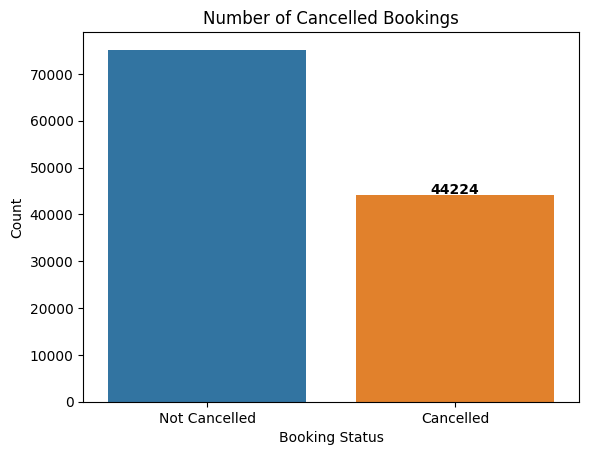

In [23]:
# Chart - 1 visualization code
cancelled_bookings = hotel_data[hotel_data['is_canceled'] == 1]
cancelled_count = cancelled_bookings.shape[0]

# Create a bar plot to visualize the cancelled bookings
sns.countplot(x='is_canceled', data=hotel_data)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Number of Cancelled Bookings')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.annotate(cancelled_count, xy=(1, cancelled_count), xytext=(1, cancelled_count + 1000),
             ha='center', va='center', color='black', fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The Bar PLot is suitable for visualizing the number of cancelled bookings in the hotel dataset for several reasons:

* Categorical Data: The booking status, whether it is cancelled or not, is a categorical variable with only two possible values. A bar plot is a common choice for visualizing the distribution of categorical variables.

* Count Comparison: The plot allows for an easy visual comparison between the count of cancelled and non-cancelled bookings. The two bars represent the two distinct categories, making it clear how many bookings were cancelled and how many were not.

* Clear Representation: The plot's simplicity and clarity make it easy to interpret the data. The x-axis represents the booking status categories, and the y-axis represents the count of bookings. This clear representation helps viewers understand the cancellation pattern in the dataset.

* Annotation: The code includes an annotation that displays the exact count of cancelled bookings above the corresponding bar. This additional information provides a precise numerical value for the cancelled bookings, making it easier to interpret the plot accurately.


Overall, the chosen bar plot effectively visualizes the number of cancelled bookings, allowing for a quick comparison and clear understanding of the cancellation pattern in the hotel dataset.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

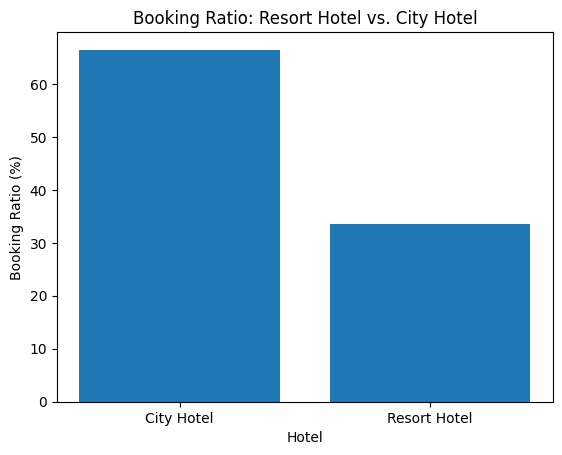

In [24]:
# Chart - 2 visualization code
# Calculate the booking count for each hotel type
booking_counts = hotel_data['hotel'].value_counts()

# Calculate the booking ratio in percentage
booking_ratio = (booking_counts / booking_counts.sum()) * 100

# Create a bar plot to visualize the booking ratio
plt.bar(booking_ratio.index, booking_ratio.values)
plt.xlabel('Hotel')
plt.ylabel('Booking Ratio (%)')
plt.title('Booking Ratio: Resort Hotel vs. City Hotel')
plt.show()


##### 1. Why did you pick the specific chart?

The Bar chart is chosen to visualize the booking ratio between the Resort Hotel and the City Hotel is a bar plot. Here are the reasons for selecting this chart:

* Comparison of Categories: A bar plot is ideal for comparing categories, such as the hotel types in this case. The distinct bars represent the different categories, making it easy to visually compare the booking ratios between the Resort Hotel and the City Hotel.

* Quantitative Representation: The length or height of each bar in the plot corresponds to the magnitude of the booking ratio. This quantitative representation allows for a clear understanding of the relative proportions between the two hotel types.

* Clear Labels: The x-axis represents the hotel types, and the y-axis represents the booking ratio in percentage. The labels provide clear information about the categories being compared and the measurement scale.

* Focus on Ratios: The bar plot emphasizes the booking ratio between the two hotel types by representing it as a proportion or percentage. This allows viewers to easily comprehend and compare the relative proportions between the Resort Hotel and the City Hotel.

Overall, the bar plot is an effective choice for visually representing the booking ratio between the Resort Hotel and the City Hotel. It enables a quick and intuitive comparison of the relative proportions and highlights the ratio aspect by presenting the data in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

 
The insights that can be obtained from the chart illustrating the booking ratio between the Resort Hotel and the City Hotel is more than 60% of the population booked the City hotel and some other insights also which are as follows:

* Booking Preference: The chart provides insights into the relative popularity or preference of the two hotel types. By comparing the heights of the bars, you can determine which hotel type has a higher booking ratio. This information indicates the booking preference of customers between the Resort Hotel and the City Hotel.

* Market Share: The chart allows you to assess the market share of each hotel type. The larger the booking ratio of a particular hotel type, the larger its market share in terms of bookings. This insight helps understand the competitive landscape between the Resort Hotel and the City Hotel.

* Potential Business Opportunities: Depending on the booking ratio, the chart can reveal potential business opportunities. For example, if the booking ratio of the Resort Hotel is significantly higher, it might indicate a demand for resort-style accommodations, leading to potential expansion or investment opportunities in that segment.

* Targeted Marketing and Resource Allocation: The booking ratio can inform marketing and resource allocation strategies. Understanding which hotel type has a higher booking ratio can help tailor marketing campaigns and allocate resources effectively to attract and accommodate the target audience.

* Competitive Analysis: The chart facilitates a comparison between the Resort Hotel and the City Hotel in terms of their booking ratios. This analysis can help identify strengths and weaknesses, areas for improvement, and potential strategies to gain a competitive advantage.

It's important to note that the insights obtained from the chart may vary depending on the actual booking ratio values and the context of the specific business or industry.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

In [25]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [26]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [27]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [28]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [29]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [30]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [31]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [32]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [33]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [34]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [35]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [36]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [37]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***